# 1. SVC

In [94]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

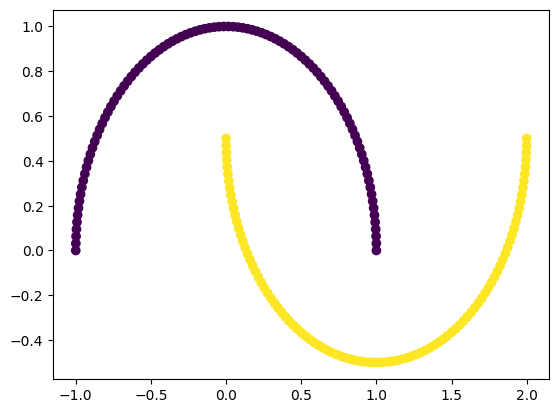

In [56]:
X, y = make_moons(n_samples=200, random_state=0, shuffle=True)

plt.scatter(X[:, 0], X[:,1], c = y)

In [57]:
train_amount = X.shape[0]/100*80
train_amount = int(train_amount)

In [58]:
X_train, y_train = X[:train_amount], y[:train_amount]
X_test, y_test = X[train_amount:], y[train_amount:]


In [77]:
def make_meshgrid(X, h=.01):
    """Create a mesh grid based on vectors X and Y."""
    if X.shape[1] > 2:
        raise ValueError('Requires a matrix of 2 features for visualization purposes.')
    
    x_min = X.min() - 1
    x_max = X.max() + 1
        
    x = np.arange(x_min, x_max, h)
        
    xx, yy = np.meshgrid(x, x)
    
    return xx, yy


xx, yy = make_meshgrid(X)
grid = np.c_[xx.ravel(), yy.ravel()]



In [92]:
def plot(title, xx, yy, svm_pred, X_test, y_test):
    
    fig, axes = plt.subplots(figsize=(5,5))
    fig.suptitle(title)
    axes.contourf(xx, yy, svm_pred, cmap=plt.cm.coolwarm)
    axes.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)

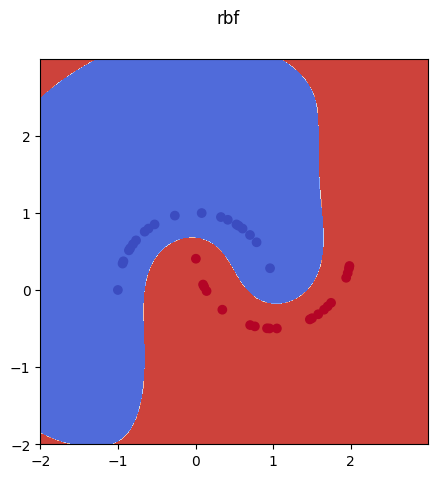

In [93]:
kernels = ['rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(grid).reshape(xx.shape)
    plot(kernel, xx, yy, svm_pred, X_test, y_test)

# 2. Model evaluation

In [95]:
import pandas as pd

## Try to understand 
by loading the data below i can see many parameters describing tumors in the breast of woman. they tumors are classified with malignant(cancerous) or benign(non cancerous). Based on the many parameters we should be able to predict if a tumour is malignant or benign for new tumors yet to be diagnosed.

## Load the data

In [96]:
df = pd.read_csv("data/breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory analysis

In [99]:
# there are more benign patients than malignant
df.groupby('diagnosis').id.count()

diagnosis
B    357
M    212
Name: id, dtype: int64

In [100]:
# we can apply Linear discriminant analysis to find the component that maximaizes the separation of the two tumors in the data


In [124]:
# devide the data
benign = np.array(df[df['diagnosis'] == 'B'].values[:, 2:], dtype=float)
malignant = np.array(df[df['diagnosis'] == 'M'].values[:, 2:], dtype=float)

In [126]:
# calculated the mean and the covariance
meanB = benign.mean(axis=0)
meanM = malignant.mean(axis=0)

nB = benign.shape[0]
nM = malignant.shape[0]

cB = np.cov(benign.T)
cM = np.cov(malignant.T)

In [127]:
## calculate the pooled covariance matrix
Sp = ((nM - 1) * cM + (nB - 1) * cB) / (nM + nB - 2)

In [131]:
a = np.linalg.inv(Sp) @ (meanB - meanM) 
a /= np.sqrt((a ** 2).sum())

tB = benign @ a 
tM = malignant @ a

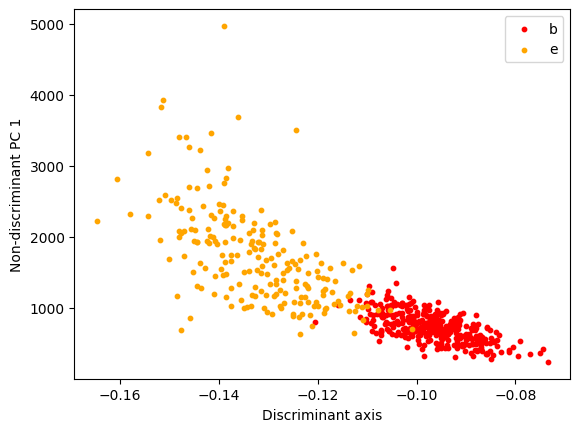

In [141]:
EB = benign - tB[:, None] * a[None, :]
EM = malignant - tM[:, None] * a[None, :]

X = np.concatenate((EB, EM), axis=0)
S = np.cov(X.T)
vals, vecs = np.linalg.eig(S)
order = vals.argsort()[::-1]
vecs = vecs[:, order]
vals = vals[order]
TB = benign @ vecs
TM = malignant @ vecs

plt.scatter(tB, TB[:, 0], s=10, c="red", label='benign')
plt.scatter(tM, TM[:, 0], s=10, c="orange", label='Malignant')
plt.xlabel("Discriminant axis")
plt.ylabel("Non-discriminant PC 1")
plt.legend('best')
plt.show()

In the image above we can see a clear difference in benign and malignant tumors in our dataset. almost so clear that you can draw a line. for this we can use a regression model. ofcourse we will also use MVC model as described in the assignment.

## Preprocess data

## Modeling

## Evaluation